# **Statistical Analysis on factors influencing Life Expectancy**

**Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population**

# problem statement

1,Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

2,Does Life Expectancy has positive or negative correlation with lifestyle, exercise, drinking alcohol etc

3,Do densely populated countries tend to have lower life expectancy?

4,Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

5,What is the impact of Immunization coverage on life Expectancy?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly
import plotly.graph_objs as g
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

C:\Users\sumit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("Life Expectancy Data.csv")

In [3]:
pd.set_option('display.max_columns' ,25)

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

from above table 
Country and Status both are ctegorical variables

In [7]:
# Renaming some column names as they contain trailing spaces.


renaming the columns to use them easily

In [8]:

df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [9]:
df.head(1)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


In [10]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


***Handling missing values ***

In [11]:
df.isnull().sum()*100/df.isnull().count()


Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

HepatitisB,GDP,Population are having large number of null values so we have to handle the null values

to handle null value we will groupby dataset by country and fill the null values according to year value of of different country

In [12]:
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [13]:

for country in country_list:
    df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate()

In [14]:
df['Life_Expectancy'].fillna(df.groupby(['Country'])['Life_Expectancy'].transform('median'), inplace = True)

In [15]:
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.569095
Percentage_Exp               0.000000
HepatitisB                   4.901293
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.000000
Tot_Exp                      7.181756
Diphtheria                   0.000000
HIV/AIDS                     0.000000
GDP                         14.363513
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [16]:
df["Life_Expectancy"].isnull().sum()

10

In [17]:
df.dropna(axis=0, subset=['Life_Expectancy'], inplace = True)


In [18]:
df['Life_Expectancy'].isnull().sum()

0

In [19]:
df['Tot_Exp'].fillna(df.groupby(['Country'])['Tot_Exp'].transform('median'), inplace = True)
df['Tot_Exp'].fillna(df.groupby(['Status'])['Schooling'].transform('median'), inplace = True)
df['Tot_Exp'].fillna(df.groupby(['Status'])['Income_Comp_Of_Resources'].transform('median'), inplace = True)
df["Tot_Exp"].fillna(df.groupby(["Status"])["BMI"].transform("median"), inplace = True)

In [20]:
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy               0
Adult_Mortality               0
Infant_Deaths                 0
Alcohol                     192
Percentage_Exp                0
HepatitisB                  144
Measles                       0
BMI                          32
Under_Five_Deaths             0
Polio                         0
Tot_Exp                       0
Diphtheria                    0
HIV/AIDS                      0
GDP                         417
Population                  644
thinness_1to19_years         32
thinness_5to9_years          32
Income_Comp_Of_Resources    160
Schooling                   160
dtype: int64

In [21]:
df.shape

(2928, 22)

In [22]:
df2=df.copy()

In [23]:
df2.dropna(inplace=True)

In [24]:
df2.isna().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

****Checking for outliers****


Visualizing the outliers of our dataset




In [25]:
#Change the data types after concatenated the dataframes

In [26]:
df2['Year'] = df2['Year'].astype('int64') 
df2['Measles'] = df2['Measles'].astype('int64') 
df2['Under_Five_Deaths'] = df2['Under_Five_Deaths'].astype('int64') 
df2['Infant_Deaths'] = df2['Infant_Deaths'].astype('int64')

In [27]:

le_cat = df2.select_dtypes(include=[np.object])
le_cat.columns

Index(['Country', 'Status'], dtype='object')

In [28]:
le_cat.head(1)    #categorical data

,Country,Status
0,Afghanistan,Developing


In [29]:
le_nu = df2.select_dtypes(include=[np.number])
le_nu.columns                                   #numerical data

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [30]:
le_nu.head(1)

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


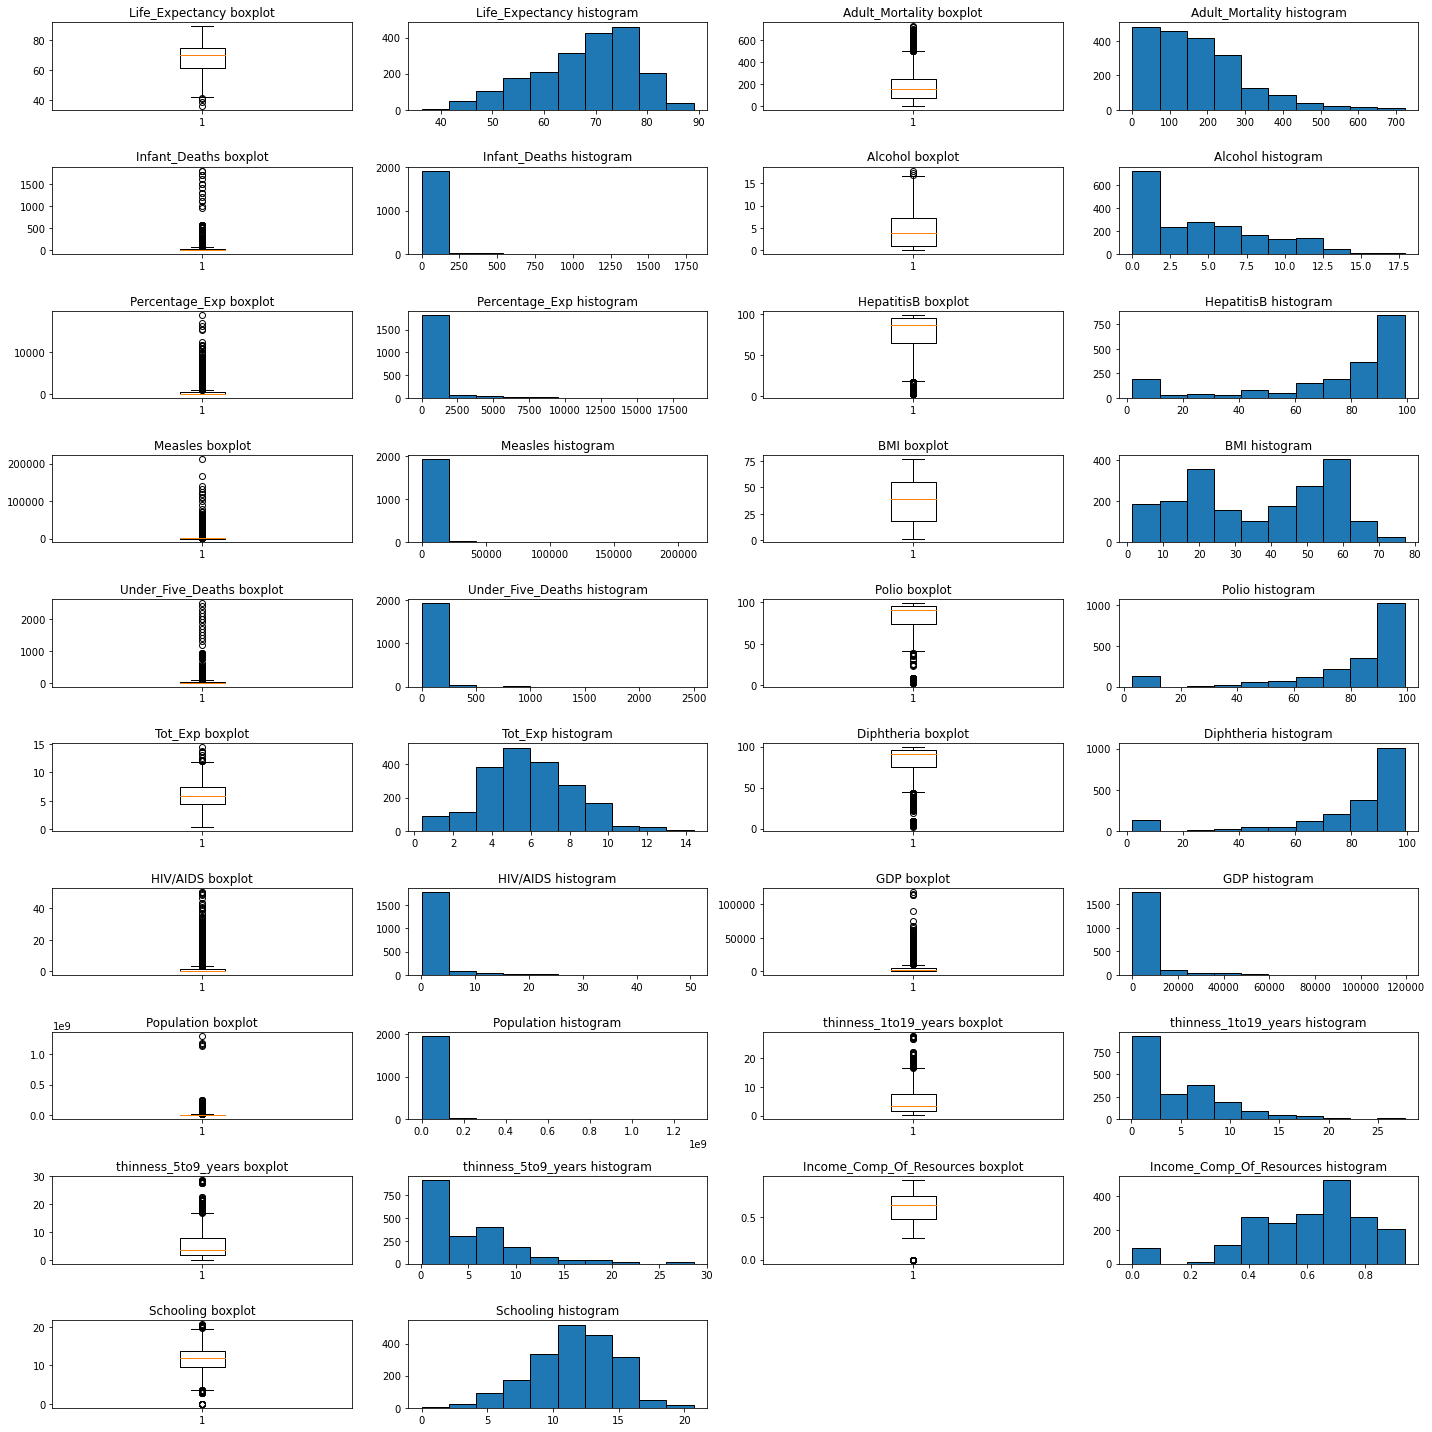

In [31]:
columns = le_nu.drop('Year', axis = 1)
sid,ax=plt.subplots(figsize=(20,20))

i = 0
for feature in columns:
    i += 1
    plt.subplot(10, 4, i)
    plt.tight_layout()
    plt.boxplot(df2[feature])
    plt.title('{} boxplot'.format(feature))
    i += 1
    plt.subplot(10, 4, i )
    plt.tight_layout()
    plt.hist(le_nu[feature],edgecolor="black")
    plt.title('{} histogram'.format(feature))
plt.show()


The winsorized mean is a useful estimator because it is less sensitive to outliers than the mean but will still give a reasonable estimate of central tendency or mean for almost all statistical models. In this regard it is referred to as a robust estimator.

Winsorizing the outliers; they will not be deleted in order not to lose important information. Manually setted percentiles for every feature outside of which the outliers would be replaced.

In [32]:

winsorized_le_nu = le_nu.copy()
winsorized_le_nu['Life_Expectancy'] = winsorize(le_nu['Life_Expectancy'], (0.01, 0))

winsorized_le_nu['Adult_Mortality'] = winsorize(le_nu['Adult_Mortality'], (0, 0.03))

winsorized_le_nu['Infant_Deaths'] = winsorize(le_nu['Infant_Deaths'], (0, 0.12))

winsorized_le_nu['Alcohol'] = winsorize(le_nu['Alcohol'], (0, 0.01))

winsorized_le_nu['Percentage_Exp'] = winsorize(le_nu['Percentage_Exp'], (0, 0.14))

winsorized_le_nu['HepatitisB'] = winsorize(le_nu['HepatitisB'], (0.11, 0))

winsorized_le_nu['Measles'] = winsorize(le_nu['Measles'], (0, 0.19))

winsorized_le_nu['Under_Five_Deaths '] = winsorize(le_nu['Under_Five_Deaths'], (0, 0.145))

winsorized_le_nu['Polio'] = winsorize(le_nu['Polio'], (0.1, 0))

winsorized_le_nu['Tot_Exp'] = winsorize(le_nu['Tot_Exp'], (0, 0.01))

winsorized_le_nu['Diphtheria'] = winsorize(le_nu['Diphtheria'], (0.11, 0))

winsorized_le_nu['HIV/AIDS'] = winsorize(le_nu['HIV/AIDS'], (0, 0.185))

winsorized_le_nu['GDP'] = winsorize(le_nu['GDP'], (0, 0.155))

winsorized_le_nu['Population'] = winsorize(le_nu['Population'], (0, 0.14))

winsorized_le_nu['thinness_1to19_years'] = winsorize(le_nu['thinness_1to19_years'], (0, 0.04))

winsorized_le_nu['thinness_5to9 years'] = winsorize(le_nu['thinness_5to9_years'], (0, 0.04))

winsorized_le_nu['Income_Comp_Of_Resources'] = winsorize(le_nu['Income_Comp_Of_Resources'], (0.05, 0))

winsorized_le_nu['Schooling'] = winsorize(le_nu['Schooling'], (0.02, 0.01))

after outlier removal

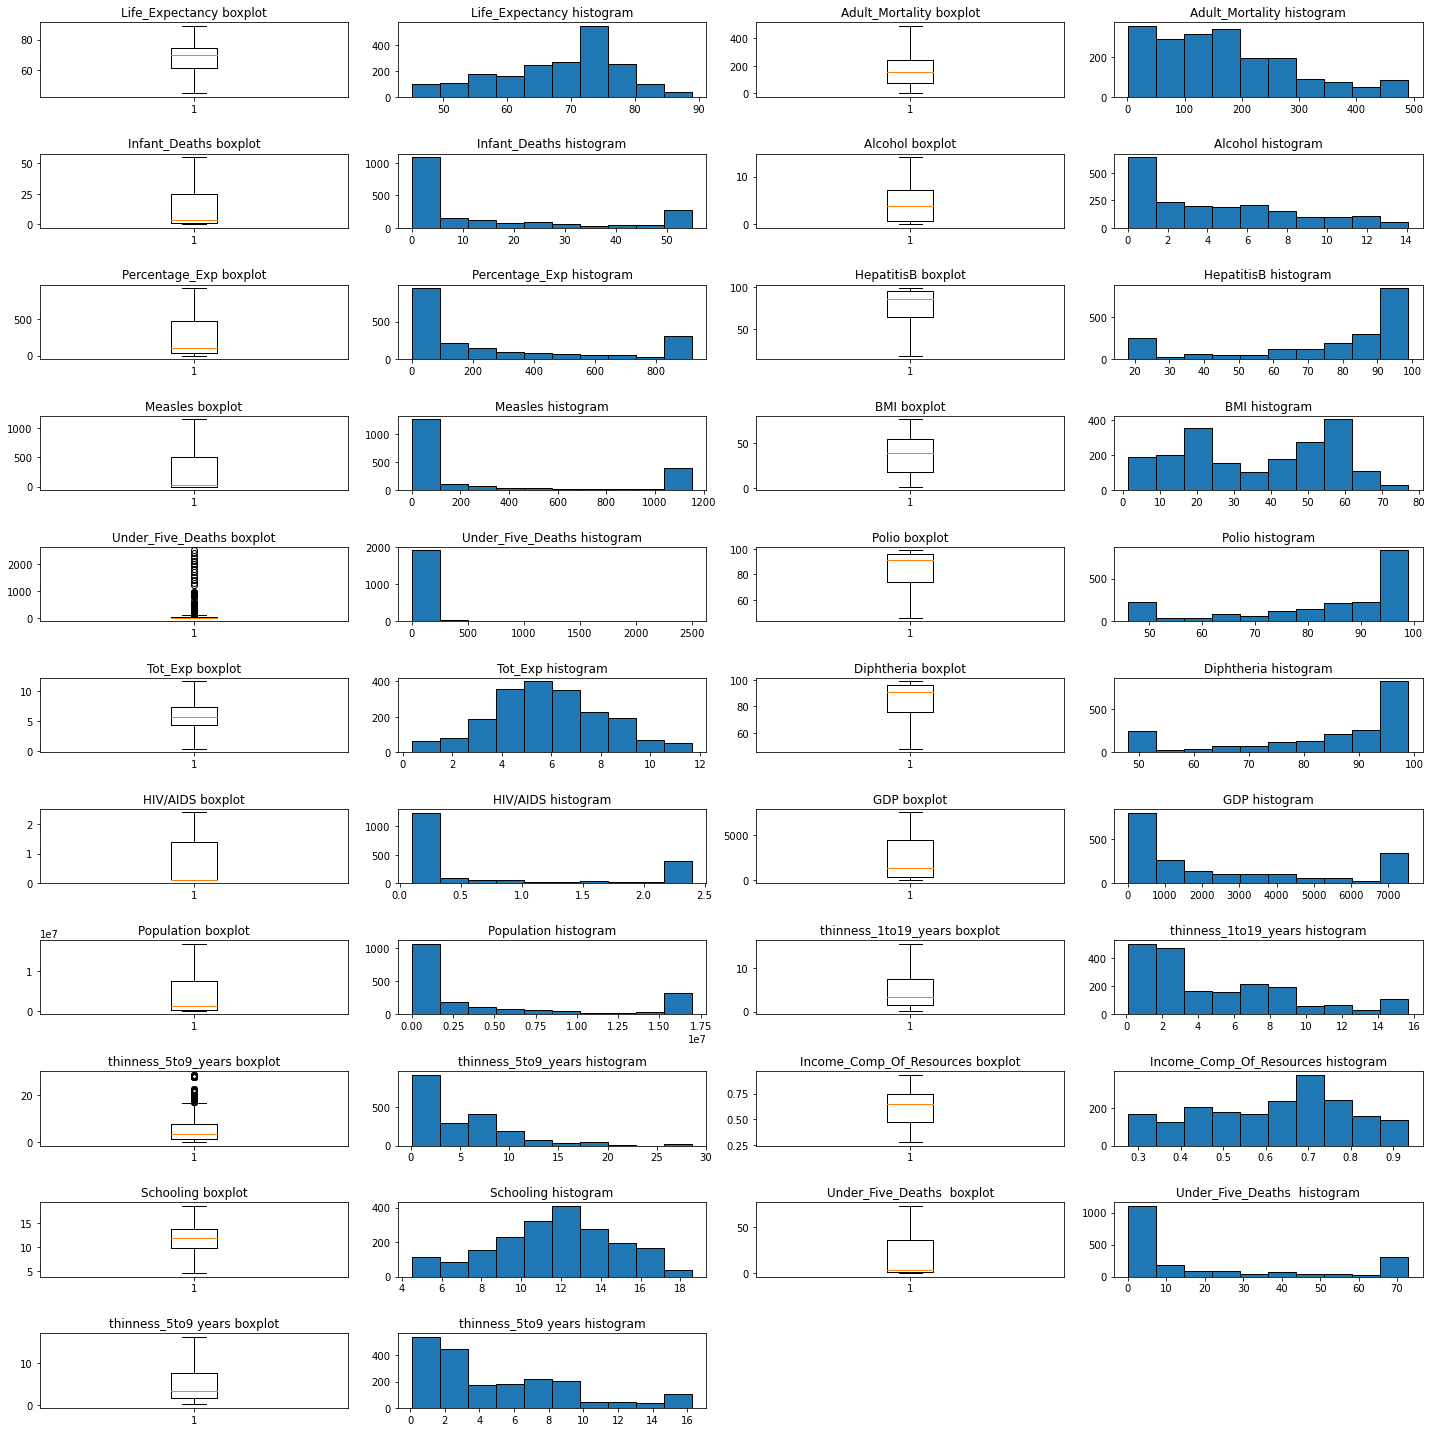

In [33]:
plt.figure(figsize=(20, 20))
after_outlier= winsorized_le_nu.drop('Year', axis = 1)
i = 0
for feature in after_outlier:
    i += 1
    plt.subplot(11,4, i)
    plt.tight_layout()
    plt.boxplot(after_outlier[feature])
    plt.title('{} boxplot'.format(feature))
    i += 1
    plt.subplot(11, 4, i )
    plt.tight_layout()
    plt.hist(after_outlier[feature],edgecolor="black")
    plt.title('{} histogram'.format(feature))
plt.show()

 Exploring the Data

In [34]:
winsorized_le_nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1987 non-null   int64  
 1   Life_Expectancy           1987 non-null   float64
 2   Adult_Mortality           1987 non-null   float64
 3   Infant_Deaths             1987 non-null   int64  
 4   Alcohol                   1987 non-null   float64
 5   Percentage_Exp            1987 non-null   float64
 6   HepatitisB                1987 non-null   float64
 7   Measles                   1987 non-null   int64  
 8   BMI                       1987 non-null   float64
 9   Under_Five_Deaths         1987 non-null   int64  
 10  Polio                     1987 non-null   float64
 11  Tot_Exp                   1987 non-null   float64
 12  Diphtheria                1987 non-null   float64
 13  HIV/AIDS                  1987 non-null   float64
 14  GDP     

In [35]:
winsorized_le_nu.shape

(1987, 22)

Distribution of Variables¶


Merge the categorical with the winsorized numerical features

In [36]:
df3 = pd.concat([winsorized_le_nu, le_cat], axis=1)

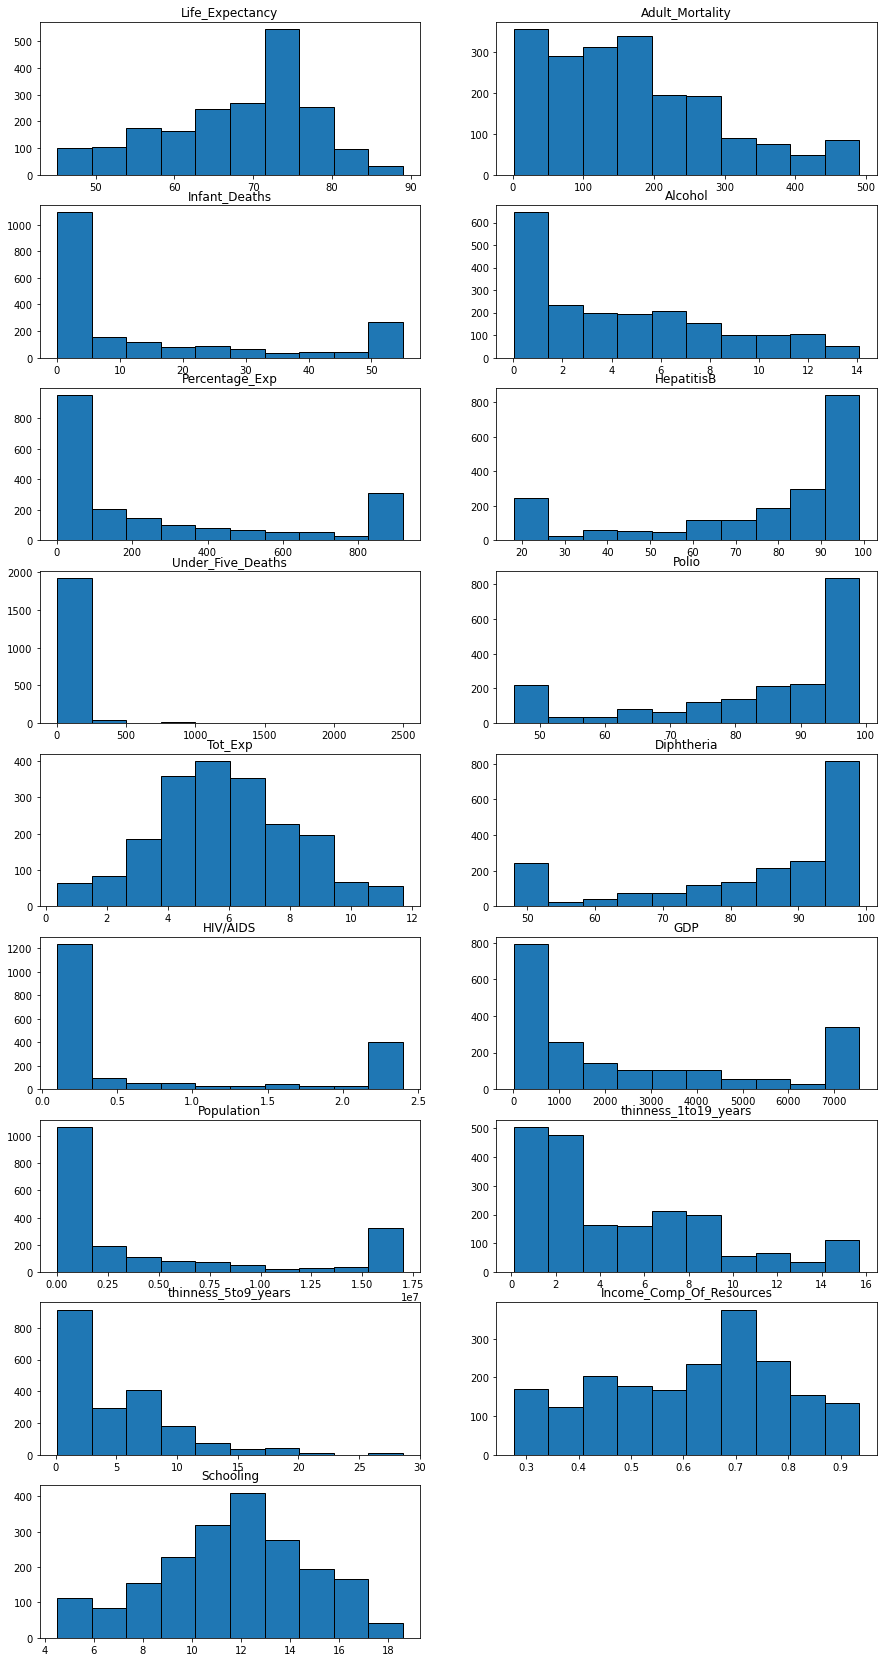

In [37]:
all_col = ['Life_Expectancy','Adult_Mortality','Infant_Deaths',
         'Alcohol','Percentage_Exp','HepatitisB',
        'Under_Five_Deaths','Polio','Tot_Exp',
         'Diphtheria','HIV/AIDS','GDP',
         'Population','thinness_1to19_years','thinness_5to9_years',
        'Income_Comp_Of_Resources',
         'Schooling',]

plt.figure(figsize=(15,60))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(winsorized_le_nu[all_col[i]],edgecolor="black")
    plt.title(all_col[i])

plt.show()

As you can see, life expectancy, total expenditure, human development index and schooling looks like having normal distributions
Now we will analyse distributions in two categories: Develeoped ones and Developing ones, let's see if there is any meaningful differences:

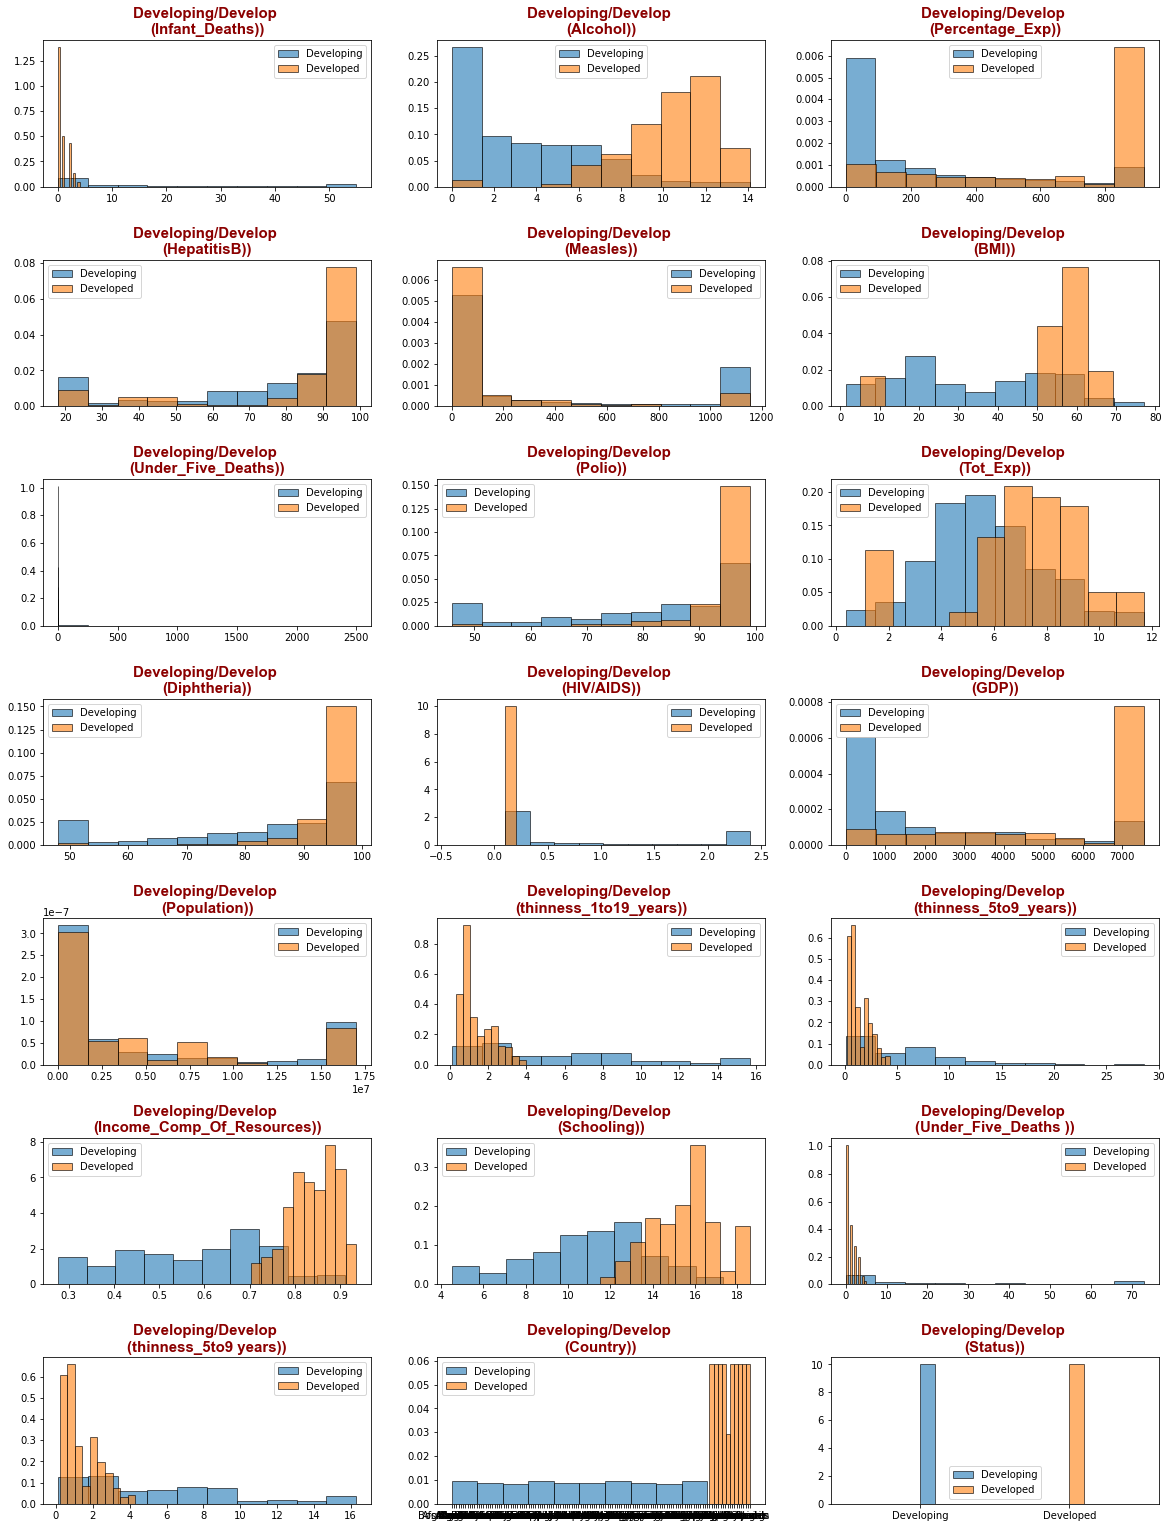

In [38]:

plt.figure(figsize=(20,35))
plt.subplots_adjust(hspace=0.5)
font_baslik={"family":"arial", "color":"darkred", "weight":"bold", "size":15}



for i in range(3, len(df3.columns)):
    plt.subplot(9,3,i+1)
    plt.hist(df3[df3["Status"]=='Developing'].iloc[:,i], density=True, alpha=0.6,edgecolor="black")
    plt.hist(df3[df3["Status"]=='Developed'].iloc[:,i], density=True, alpha=0.6,edgecolor="black")
    plt.legend(["Developing", "Developed"])
    plt.ylabel
    plt.title("Developing/Develop \n({}))".format(df3.columns[i]), 
              fontdict=font_baslik)
    
plt.show()


As expected, some variable distrubutions are different in developed countries such as schooling, total expenditure, GDP, life expectancy and alcohol.

we can easily interperet that developing countries are lacking in almost everything  in above  aspects their infant death is high,thinness is high ,schooling is low,incom is low,death cases in every category is high ,immunization with respect to disease like Diptheria,polio is low ,death because of disease lke HIV is high ,number of reported measles is high .conclusion is developed countries are performing well in every aspect.

***Features's relation with the target ***

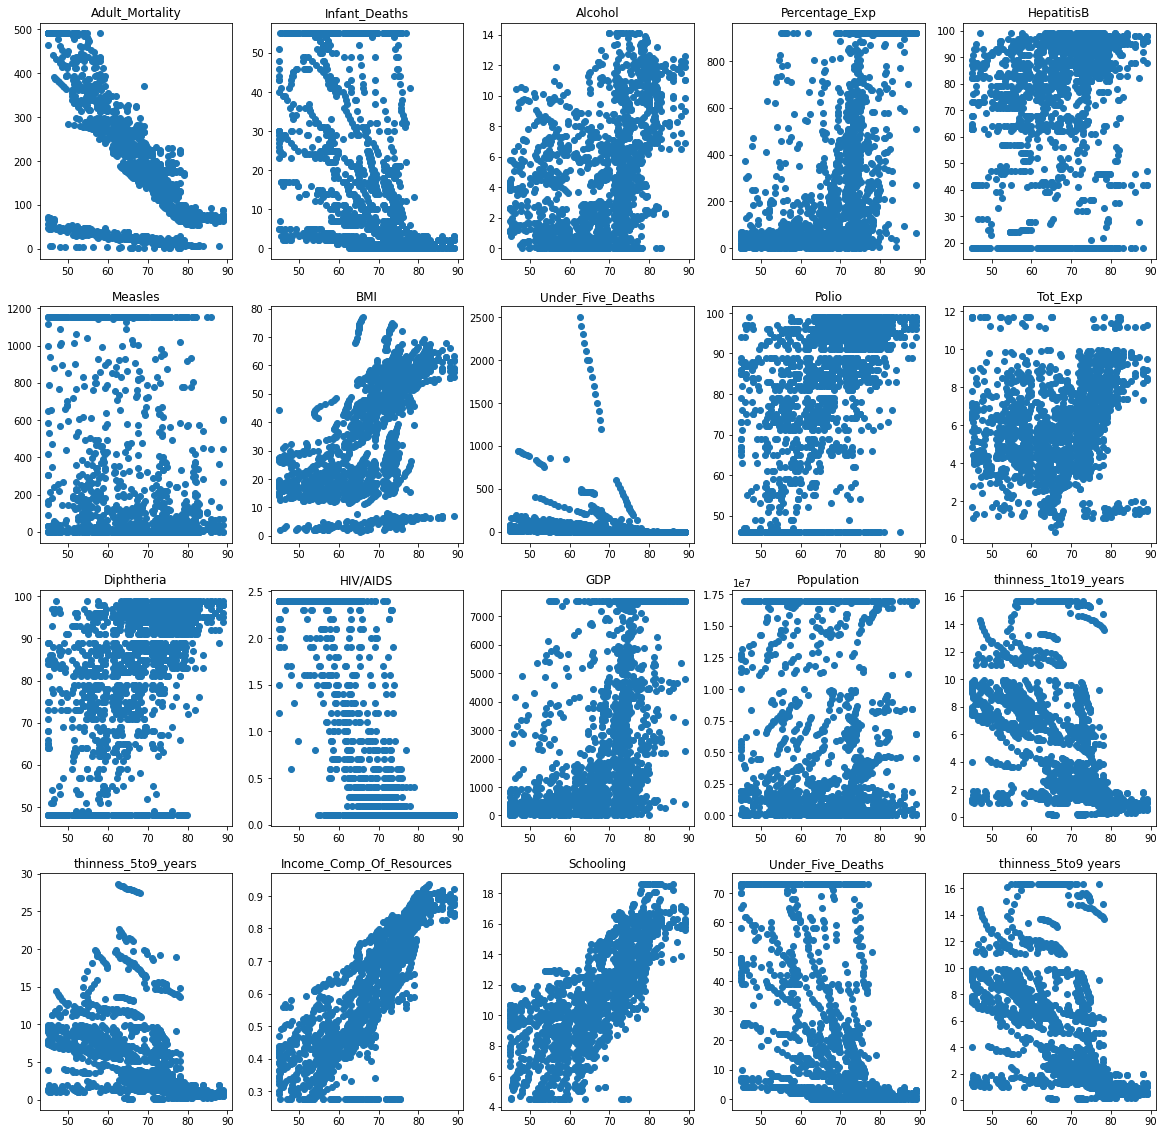

In [39]:
columns_scatter =winsorized_le_nu.columns.drop(['Life_Expectancy', 'Year'])

plt.figure(figsize = (20, 20))
for i in range(len(columns_scatter)):
    plt.subplot(4,5, i + 1)
    plt.scatter(winsorized_le_nu['Life_Expectancy'], winsorized_le_nu[columns_scatter[i]])
    plt.title(columns_scatter[i])

This scatter plot shows that 'Schooling', 'Income composition of resources' and 'BMI' have a strong positive correlation with Life Expectancy. On the other hand 'Adult Mortality', 'HIV/AIDS' and 'Sanitation/Mortality/100000(2016)' have a negative correlation with Life Expectancy.

Correlation matrix between all the numerical features

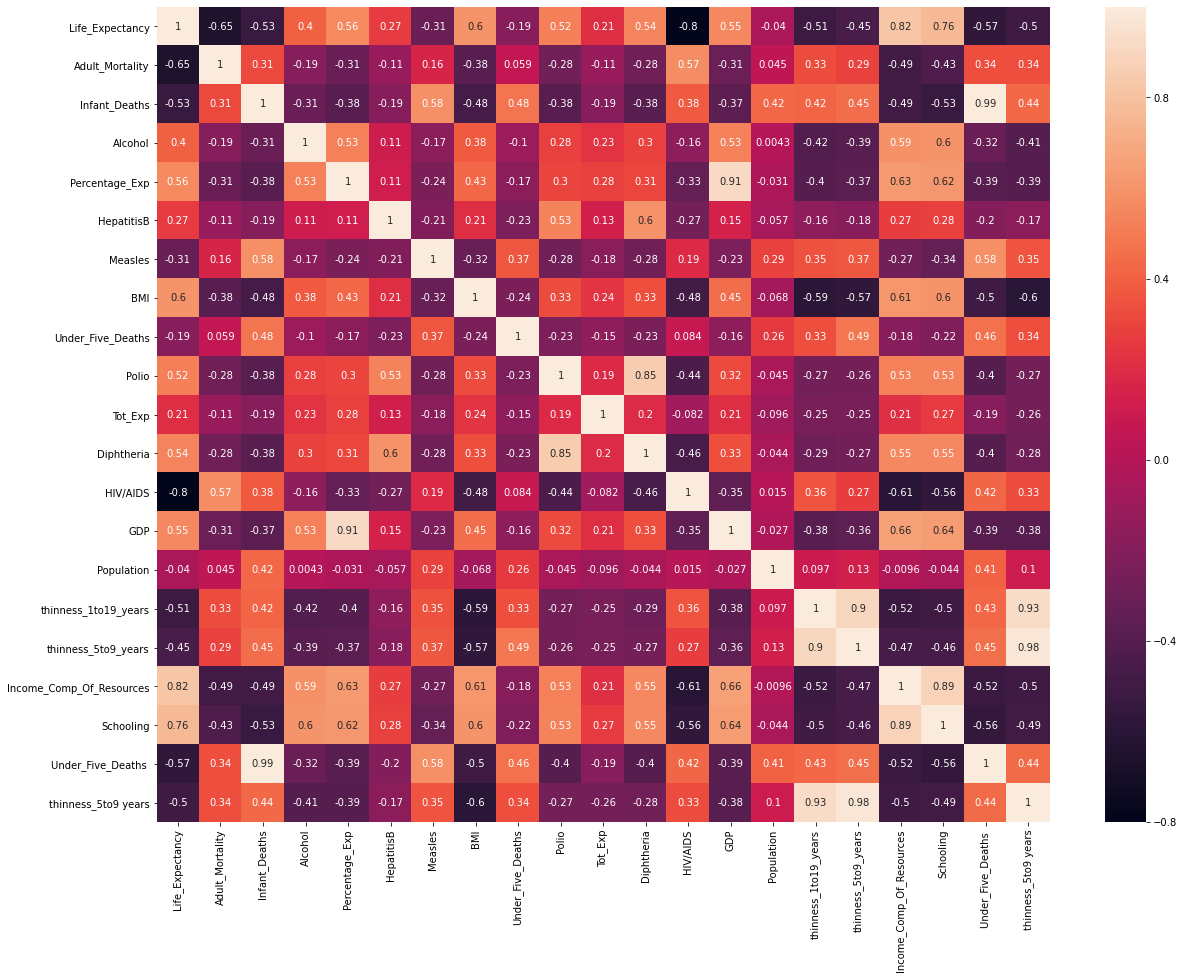

In [40]:
Corr1 = winsorized_le_nu.drop('Year', axis = 1).corr()
plt.figure(figsize = (20, 15))
sns.heatmap(Corr1, annot = True)


Features with an absolute correlation with target variable > 0.5

In [41]:
corrLifeExp = abs(Corr1["Life_Expectancy"])
bestFeatures = corrLifeExp[corrLifeExp>0.5]
bestFeatures = bestFeatures.drop('Life_Expectancy')
bestFeatures.sort_values()

thinness_1to19_years        0.507870
Polio                       0.521506
Infant_Deaths               0.528087
Diphtheria                  0.541873
GDP                         0.554830
Percentage_Exp              0.559687
Under_Five_Deaths           0.565619
BMI                         0.601434
Adult_Mortality             0.654255
Schooling                   0.762333
HIV/AIDS                    0.801286
Income_Comp_Of_Resources    0.823222
Name: Life_Expectancy, dtype: float64

Correlation matrix between the top 5 correlated features to the target variable


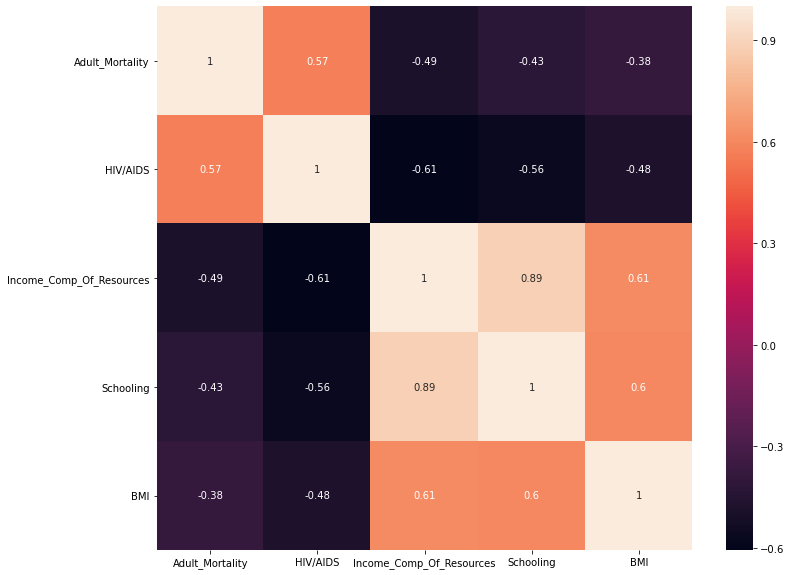

In [42]:
Corr2 = winsorized_le_nu[['Adult_Mortality', 'HIV/AIDS', 'Income_Comp_Of_Resources', 'Schooling',
       'BMI']].corr()
plt.figure(figsize = (12, 10))
sns.heatmap(Corr2, annot = True)

Life expectancy exploration


Life expectancy values for every country

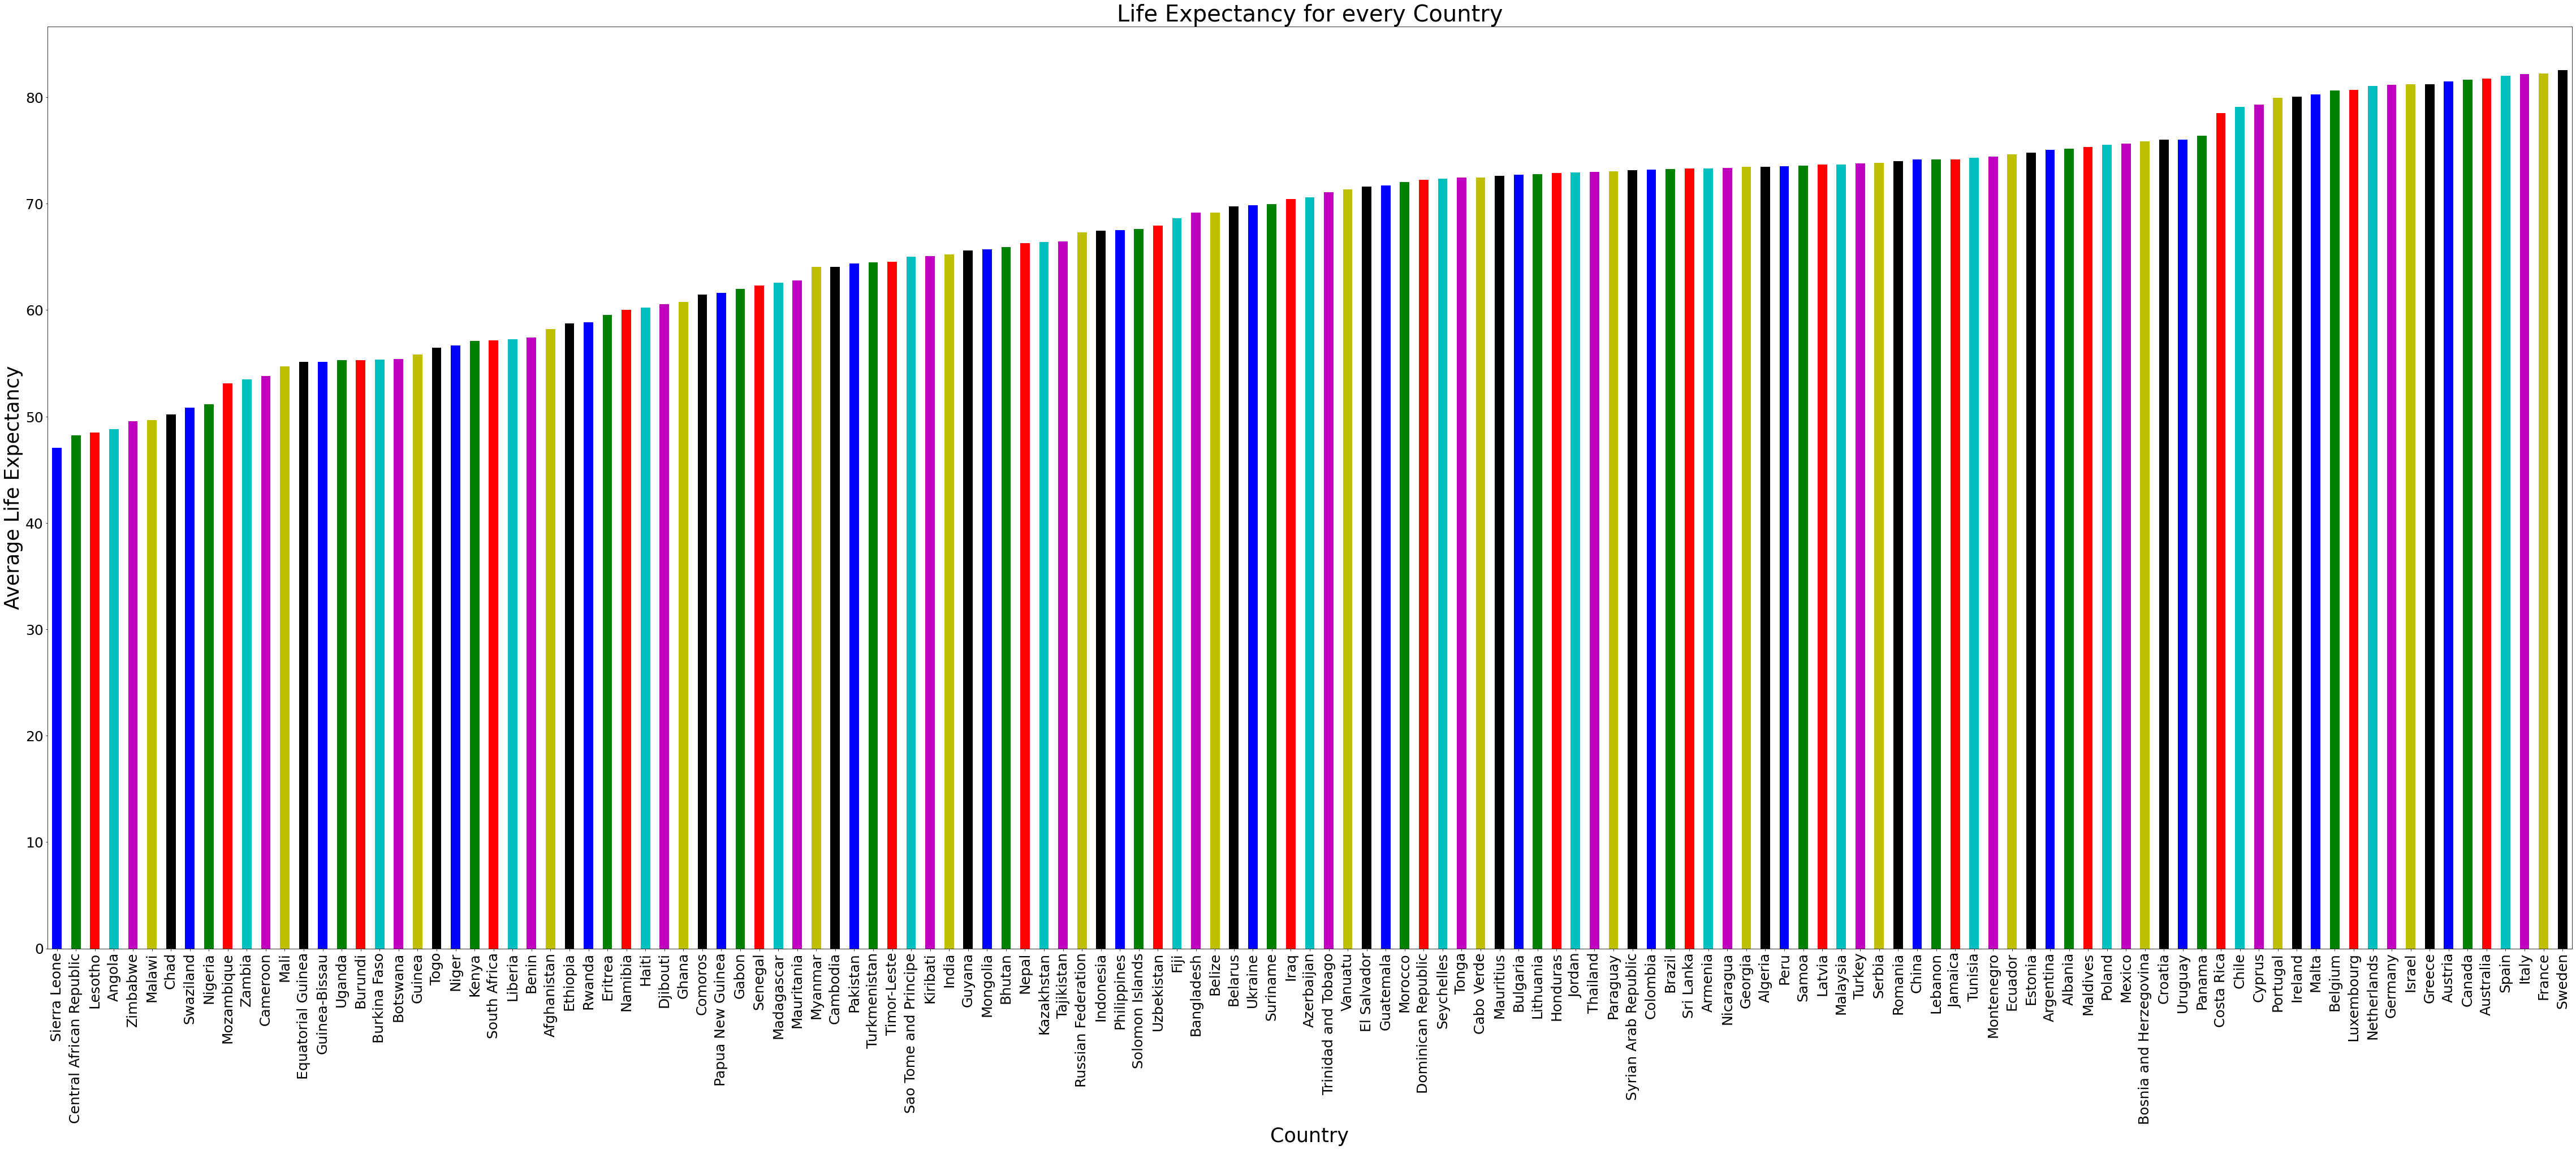

In [43]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
LifeExpCountry = df3.groupby('Country')['Life_Expectancy'].mean().sort_values()
LifeExpCountry.plot(kind='bar', figsize=(80,30), fontsize=25, color = colors )
plt.title("Life Expectancy for every Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life Expectancy",fontsize=35)
plt.show()

In [44]:
LifeExpCountry.head()

Country
Sierra Leone                47.066667
Central African Republic    48.246667
Lesotho                     48.513333
Angola                      48.793333
Zimbabwe                    49.533333
Name: Life_Expectancy, dtype: float64

these are the 5 country which are having the lowest Life Expectancy value

reason is quite sure that they are suffering from some internal issue like civil war like situation


***Problem solving***

applying multilinear regression concept

1.dealing with  multicollinearity

according to heatmap I will drop one feature of the pair of columns those  are highly correlated to each other

In [45]:
winsorized_le_nu.head()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Under_Five_Deaths,thinness_5to9 years
0,2015,65.0,263.0,55,0.01,71.279624,65.0,1154,19.1,83,46.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,17.3,0.479,10.1,73,16.3
1,2014,59.9,271.0,55,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,17.5,0.476,10.0,73,16.3
2,2013,59.9,268.0,55,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,17.7,0.470,9.9,73,16.3
3,2012,59.5,272.0,55,0.01,78.184215,67.0,1154,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,18.0,0.463,9.8,73,16.3
4,2011,59.2,275.0,55,0.01,7.097109,68.0,1154,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,18.2,0.454,9.5,73,16.3


In [46]:
df_life =winsorized_le_nu.copy()

In [47]:
df_life.head()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Under_Five_Deaths,thinness_5to9 years
0,2015,65.0,263.0,55,0.01,71.279624,65.0,1154,19.1,83,46.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,17.3,0.479,10.1,73,16.3
1,2014,59.9,271.0,55,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,17.5,0.476,10.0,73,16.3
2,2013,59.9,268.0,55,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,17.7,0.470,9.9,73,16.3
3,2012,59.5,272.0,55,0.01,78.184215,67.0,1154,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,18.0,0.463,9.8,73,16.3
4,2011,59.2,275.0,55,0.01,7.097109,68.0,1154,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,18.2,0.454,9.5,73,16.3


In [48]:
df_life.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources', 'Schooling', 'Under_Five_Deaths ',
       'thinness_5to9 years'],
      dtype='object')

In [49]:
df_life.drop([ "Year","Percentage_Exp",'thinness_5to9_years',"Income_Comp_Of_Resources","thinness_5to9 years","Polio","Income_Comp_Of_Resources"], axis=1,inplace=True)

In [50]:
df_life.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Schooling,Under_Five_Deaths
0,65.0,263.0,55,0.01,65.0,1154,19.1,83,8.16,65.0,0.1,584.259210,16993354.0,15.7,10.1,73
1,59.9,271.0,55,0.01,62.0,492,18.6,86,8.18,62.0,0.1,612.696514,327582.0,15.7,10.0,73
2,59.9,268.0,55,0.01,64.0,430,18.1,89,8.13,64.0,0.1,631.744976,16993354.0,15.7,9.9,73
3,59.5,272.0,55,0.01,67.0,1154,17.6,93,8.52,67.0,0.1,669.959000,3696958.0,15.7,9.8,73
4,59.2,275.0,55,0.01,68.0,1154,17.2,97,7.87,68.0,0.1,63.537231,2978599.0,15.7,9.5,73


In [51]:
df_life.shape

(1987, 16)

In [52]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


In [53]:
y_target = df_life['Life_Expectancy']
X_independent= df_life.drop(columns=['Life_Expectancy'], axis=1)

In [54]:
X_independent.head()

,Adult_Mortality,Infant_Deaths,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Schooling,Under_Five_Deaths
0,263.0,55,0.01,65.0,1154,19.1,83,8.16,65.0,0.1,584.259210,16993354.0,15.7,10.1,73
1,271.0,55,0.01,62.0,492,18.6,86,8.18,62.0,0.1,612.696514,327582.0,15.7,10.0,73
2,268.0,55,0.01,64.0,430,18.1,89,8.13,64.0,0.1,631.744976,16993354.0,15.7,9.9,73
3,272.0,55,0.01,67.0,1154,17.6,93,8.52,67.0,0.1,669.959000,3696958.0,15.7,9.8,73
4,275.0,55,0.01,68.0,1154,17.2,97,7.87,68.0,0.1,63.537231,2978599.0,15.7,9.5,73


In [55]:
X_independent.shape

(1987, 15)

In [56]:
y_target.shape

(1987,)

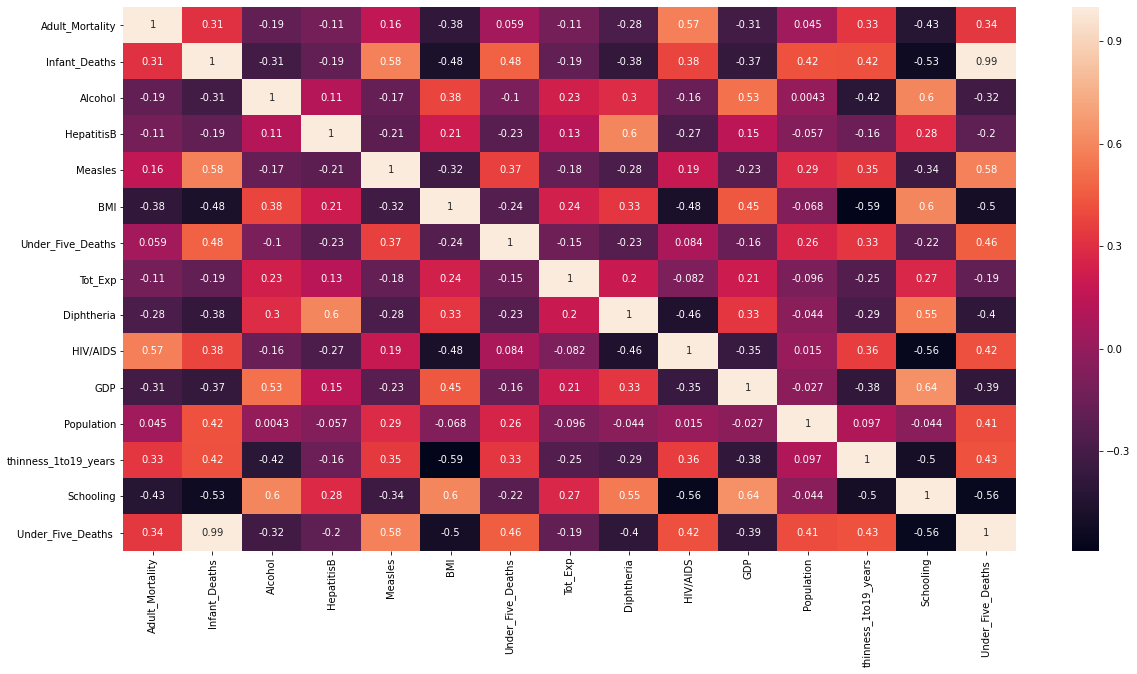

In [57]:

ax=plt.subplots(figsize=(20,10))
sns.heatmap(X_independent.corr(),annot=True)

here the multicollinearity is successfully removed with the help of heatmap

In [58]:
X_independent =sm.add_constant(X_independent)
model = sm.OLS(y_target, X_independent).fit()
prediction = model.summary()
prediction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     703.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:19   Log-Likelihood:                -5487.9
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1971   BIC:                         1.110e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.3810      0.783     78.361      0.000      59.845      62.917
Adult_Mortality         -0.0159      0.001    -18.026      0.000      -0.018      -0.014
Infant_Deaths            0.2461      0.045      5.422      0.000       0.157       0.335
Alcohol                  0.0300      0.030      0.993      0.321      -0.029       0.089
HepatitisB              -0.0139      0.004     -3.347      0.001      -0.022      -0.006
Measles                 -0.0002      0.000     -0.924      0.356      -0.001       0.000
BMI                      0.0147      0.006      2.331      0.020       0.002       0.027
Under_Five_Deaths    -5.465e-05      0.001     -0.099      0.921      -0.001       0.001
Tot_Exp                  0.0887      0.041      2.183      0.029       0.009       0.168
Diphtheria               0.0508      0.008      6.591      0.000       0.036       0.066
HIV/AIDS                -4.1205      0.142    -29.027      0.000      -4.399      -3.842
GDP                      0.0003   4.27e-05      7.492      0.000       0.000       0.000
Population            5.218e-08    1.6e-08      3.255      0.001    2.07e-08    8.36e-08
thinness_1to19_years    -0.1261      0.028     -4.499      0.000      -0.181      -0.071
Schooling                0.7124      0.052     13.593      0.000       0.610       0.815
Under_Five_Deaths       -0.2159      0.034     -6.424      0.000      -0.282      -0.150
==============================================================================
Omnibus:                       55.029   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.995
Skew:                          -0.187   Prob(JB):                     1.59e-23
Kurtosis:                       4.062   Cond. No.                     7.15e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

HERE

1. r square is .839 it means that  approximately 83% of the variation in the dependent variable are explained by independent variable
2. here Alcohol,Measles,Under_Five_Deaths,Tot_Exp are insignificant


now we will apply the stepwise backward selection regression method to find best feature of the model

#  Variable Selection (Step 1)
removing the variable having highest p value

In [59]:
X_ind_1= X_independent.drop("Under_Five_Deaths",axis=1)
model_1 = sm.OLS(y_target,X_ind_1, hasconst=bool).fit()
print('== Variable Selection (Step 1) ==')
print('')
print(model_1.summary())
print('')


== Variable Selection (Step 1) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     753.9
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:19   Log-Likelihood:                -5487.9
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1972   BIC:                         1.109e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

step_2


removing Alcohal to check r value

In [60]:
X_ind_2= X_independent.drop(["Under_Five_Deaths","Alcohol"],axis=1)
model_2 = sm.OLS(y_target,X_ind_2, hasconst=bool).fit()
print('== Variable Selection (Step 3) ==')
print('')
print(model_2.summary())
print('')

== Variable Selection (Step 3) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     811.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:19   Log-Likelihood:                -5488.4
No. Observations:                1987   AIC:                         1.100e+04
Df Residuals:                    1973   BIC:                         1.108e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

step 3

removing the feature having 3rd highest p value

In [61]:
X_ind_3= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles"],axis=1)
model_3 = sm.OLS(y_target,X_ind_3, hasconst=bool).fit()
print('== Variable Selection (Step 3) ==')
print('')
print(model_3.summary())
print('')

== Variable Selection (Step 3) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     879.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:19   Log-Likelihood:                -5488.8
No. Observations:                1987   AIC:                         1.100e+04
Df Residuals:                    1974   BIC:                         1.108e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

step-4

removing the feature which is having 4th highest p value and insignificant and observing the OLS output

In [62]:
X_ind_4= X_independent.drop([],axis=1)
model_4 = sm.OLS(y_target,X_ind_4, hasconst=bool).fit()
print('== Variable Selection (Step 4) ==')
print('')
print(model_4.summary())
print('')

== Variable Selection (Step 4) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     957.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:19   Log-Likelihood:                -5491.4
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1975   BIC:                         1.107e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

step:5

In [64]:
X_ind_5= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","GDP"],axis=1)
model_5 = sm.OLS(y_target,X_ind_5, hasconst=bool).fit()
print('== Variable Selection (Step 5) ==')
print('')
print(model_5.summary())
print('')

== Variable Selection (Step 5) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1014.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:35:57   Log-Likelihood:                -5523.0
No. Observations:                1987   AIC:                         1.107e+04
Df Residuals:                    1976   BIC:                         1.113e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [67]:
X_ind_6= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Adult_Mortality"],axis=1)
model_6= sm.OLS(y_target,X_ind_6, hasconst=bool).fit()
print('== Variable Selection (Step 6) ==')
print('')
print(model_6.summary())
print('')

== Variable Selection (Step 6) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     875.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:38:38   Log-Likelihood:                -5643.8
No. Observations:                1987   AIC:                         1.131e+04
Df Residuals:                    1976   BIC:                         1.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [86]:
X_ind_7= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","HIV/AIDS"],axis=1)
model_7= sm.OLS(y_target,X_ind_7, hasconst=bool).fit()
print('== Variable Selection (Step 6) ==')
print('')
print(model_7.summary())
print('')

== Variable Selection (Step 6) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     665.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:57:03   Log-Likelihood:                -5859.6
No. Observations:                1987   AIC:                         1.174e+04
Df Residuals:                    1976   BIC:                         1.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [69]:
X_ind_8= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Adult_Mortality"],axis=1)
model_8= sm.OLS(y_target,X_ind_8, hasconst=bool).fit()
print('== Variable Selection (Step 7) ==')
print('')
print(model_8.summary())
print('')

== Variable Selection (Step 7) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     875.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:42:04   Log-Likelihood:                -5643.8
No. Observations:                1987   AIC:                         1.131e+04
Df Residuals:                    1976   BIC:                         1.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [74]:
X_ind_8= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","BMI"],axis=1)
model_8= sm.OLS(y_target,X_ind_8, hasconst=bool).fit()
print('== Variable Selection (Step 8) ==')
print('')
print(model_8.summary())
print('')

== Variable Selection (Step 8) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:47:20   Log-Likelihood:                -5494.5
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1976   BIC:                         1.107e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [73]:
X_ind_9= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","HepatitisB"],axis=1)
model_9= sm.OLS(y_target,X_ind_9, hasconst=bool).fit()
print('== Variable Selection (Step 9) ==')
print('')
print(model_9.summary())
print('')

== Variable Selection (Step 9) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:46:45   Log-Likelihood:                -5496.7
No. Observations:                1987   AIC:                         1.102e+04
Df Residuals:                    1976   BIC:                         1.108e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [75]:
X_ind_9= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Diphtheria"],axis=1)
model_9= sm.OLS(y_target,X_ind_9, hasconst=bool).fit()
print('== Variable Selection (Step 9) ==')
print('')
print(model_9.summary())
print('')

== Variable Selection (Step 9) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1025.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:48:22   Log-Likelihood:                -5514.3
No. Observations:                1987   AIC:                         1.105e+04
Df Residuals:                    1976   BIC:                         1.111e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [77]:
X_ind_10= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Population"],axis=1)
model_10= sm.OLS(y_target,X_ind_10, hasconst=bool).fit()
print('== Variable Selection (Step 10) ==')
print('')
print(model_10.summary())
print('')

== Variable Selection (Step 10) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:50:14   Log-Likelihood:                -5496.3
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1976   BIC:                         1.108e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [78]:
X_ind_11= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","thinness_1to19_years"],axis=1)
model_11= sm.OLS(y_target,X_ind_10, hasconst=bool).fit()
print('== Variable Selection (Step 11) ==')
print('')
print(model_10.summary())
print('')

== Variable Selection (Step 11) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:52:29   Log-Likelihood:                -5496.3
No. Observations:                1987   AIC:                         1.101e+04
Df Residuals:                    1976   BIC:                         1.108e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [84]:
X_ind_12= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Schooling"],axis=1)
model_12= sm.OLS(y_target,X_ind_12, hasconst=bool).fit()
print('== Variable Selection (Step 12) ==')
print('')
print(model_12.summary())
print('')

== Variable Selection (Step 12) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     919.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:55:18   Log-Likelihood:                -5604.2
No. Observations:                1987   AIC:                         1.123e+04
Df Residuals:                    1976   BIC:                         1.129e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [85]:
X_ind_12= X_independent.drop(["Under_Five_Deaths","Alcohol","Measles","Tot_Exp","Under_Five_Deaths","HIV/AIDS"],axis=1)
model_12= sm.OLS(y_target,X_ind_12, hasconst=bool).fit()
print('== Variable Selection (Step 12) ==')
print('')
print(model_12.summary())
print('')

== Variable Selection (Step 12) ==

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     665.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:55:57   Log-Likelihood:                -5859.6
No. Observations:                1987   AIC:                         1.174e+04
Df Residuals:                    1976   BIC:                         1.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

so after doing backward regression analysis it is found that "Under_Five_Deaths","Alcohol","Measles","Tot_Exp" these 4 features are insignificant they are not improving the R values and removing of other features decreasing the R values so we will keep those feature in the final model

X_ind_4 is our final combination of variables to build a model

# conclusion after doing stepwise regression and observing  OLS summary:

1.we have choosen initially 21 features to compare them to Life expectancy value 
   my target is to find out wheather these features effecting life expectancy of the people of that country.

2.my 2nd aim is to select the best features those are effecting the target features 

4.to select best feature I took the help of heat map and also OLS summery of the features

5.here adjusted r squre and r square value both are decreasing after removing any insignificant variable as shown after step 4

6.I also checked a multicollinearity and step by step regression concept to chek how much the insignificant features are effecting the target features


results :


1.out of 21 features only 11 features are significant with  life expectancy



2.Reduction of features are done to decrease multicollinearity 


3.I analyse OLS summary and observe the p value according to chi-square test for removing the insignificant features 


4.Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc
ans:positive correlation,Alcohal is not affecting the life expectancy its p value is very much insignificant


5.population is effecting the life expectancy significantly ,correlation coffecient is  negative that means that it is adversely affecting the life expectancy

6.Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
ans:YES because total healthcare expenditure id directly reated to life expectancy value it's p value is also very significant and correlation is very high to life expectancy value


7.What is the impact of Immunization coverage on life Expectancy?

ans:immunization coverage from disease like Diptheria,Polio is very important immunizationion coverage directly effect to the life expactancy

now these are the features I will use for model building:

In [88]:
y_target            #target variable
X_ind_4.head()      #independent variables

,const,Adult_Mortality,Infant_Deaths,HepatitisB,BMI,Diphtheria,HIV/AIDS,Population,thinness_1to19_years,Schooling,Under_Five_Deaths
0,1.0,263.0,55,65.0,19.1,65.0,0.1,16993354.0,15.7,10.1,73
1,1.0,271.0,55,62.0,18.6,62.0,0.1,327582.0,15.7,10.0,73
2,1.0,268.0,55,64.0,18.1,64.0,0.1,16993354.0,15.7,9.9,73
3,1.0,272.0,55,67.0,17.6,67.0,0.1,3696958.0,15.7,9.8,73
4,1.0,275.0,55,68.0,17.2,68.0,0.1,2978599.0,15.7,9.5,73


now using these features I will make a model to predict  life expectancy 

applying regression model

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X=X_ind_4
y=y_target

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1331, 11)
(656, 11)
(1331,)
(656,)


In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
predictions= regressor.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

Text(0.5, 0, 'Y test')

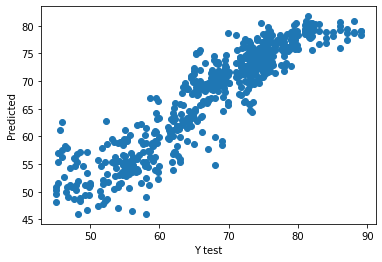

In [96]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

**Evaluating the Model**


evaluation of model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculation of the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [97]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(regressor.score(X_test, y_test)))


MAE: 2.855907219437858
MSE: 14.924283498982028
RMSE: 3.8631960212992076
Variance score: 0.8479925734218574


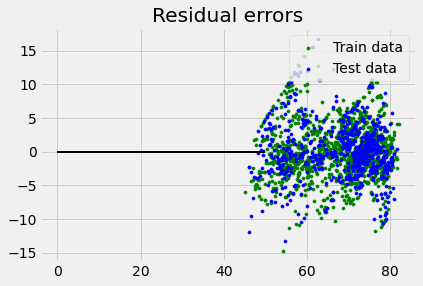

In [98]:
# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 


Residuals
we should have gotten a  good model with a good fit. 

Now ploting a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

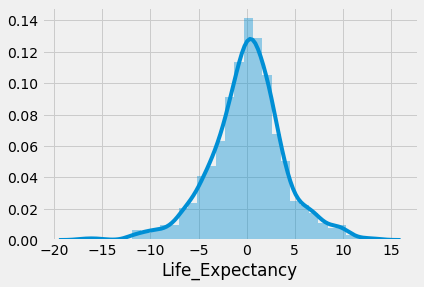

In [99]:
sns.distplot((y_test-predictions))

Normality of the residuals is an assumption of running a linear model. So, if your residuals are normal, it means that your assumption is valid and model inference (confidence intervals, model predictions) should also be valid